# **Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения**



## Описание задачи
В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделий, сборка которых состоит из элементов, состоящих из разнородного материала.

Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов.

Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию.

Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической системы (FP).

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).

В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварного шва для каждого образца проводились в 4-х поперечных сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 — 20 кВ. Набор полученных данных собран в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов. Статистические показатели набора обучающих данных указаны в таблице 1.

### Таблица 1. Статистические показатели набора обучающих данных

| Показатель  | IW     | IF     | VW     | FP     | Depth  | Width  |
|-------------|--------|--------|--------|--------|--------|--------|
| Количество  | 72     | 72     | 72     | 72     | 72     | 72     |
| Среднее     | 45.666 | 141.333| 8.639  | 78.333 | 1.196  | 1.970  |
| Среднеквадр. откл. | 1.678 | 5.146  | 2.061  | 21.494 | 0.225  | 0.279  |
| Минимум     | 43     | 131    | 4.5    | 50     | 0.8    | 1.68   |
| 25%         | 44     | 139    | 8      | 60     | 1.08   | 1.76   |
| 50%         | 45     | 141    | 9      | 80     | 1.20   | 1.84   |
| 75%         | 47     | 146    | 10     | 100    | 1.29   | 2.05   |
| Максимум    | 49     | 150    | 12     | 125    | 1.76   | 2.60   |


# **Задача**
Решить задачу регрессии (одним или несколькими методами) для предсказания глубины и ширины сварного соединения, выполнив необходимые этапы (разведочный анализ, предобработка).

#**Разведочный анализ данных**

##Импортируем нужные библиотеки

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##Импортируем данные

In [5]:
df = pd.read_csv("ebw_data.csv")
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


##Очистка и подготовка данных

In [6]:
# Проверяем на наличие проропущенных значений и формат ячеек
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [7]:
# Смотрим разброс, среднее, медиана, макс и мин значения
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [8]:
# Проверяем на наличие дубликатов
df.duplicated().sum()

7

In [9]:
df.shape

(72, 6)

Пропусков не обнаружено, найдено 7 дубликатов, названия колонок в разном регистре. Необходимо избавиться от дубликатов и привести колонки к единому регистру:

In [10]:
# Приводим к нижнему регистру
df.columns=df.columns.str.lower()

# Удаляем дубликаты
df = df.drop_duplicates()

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iw      65 non-null     int64  
 1   if      65 non-null     int64  
 2   vw      65 non-null     float64
 3   fp      65 non-null     int64  
 4   depth   65 non-null     float64
 5   width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB


(65, 6)

In [11]:
# Для переноса модели и дальнейшего использования, было принято решение переименовать колонку "if" в "i", во избежание конфликта при написании програмы во Flask
df.rename(columns={"if":"i"}, inplace=True)
df.head()

,iw,i,vw,fp,depth,width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


##Анализ данных

###Построение графиков Boxplot ("Ящик с усами"), показывающие выбросы

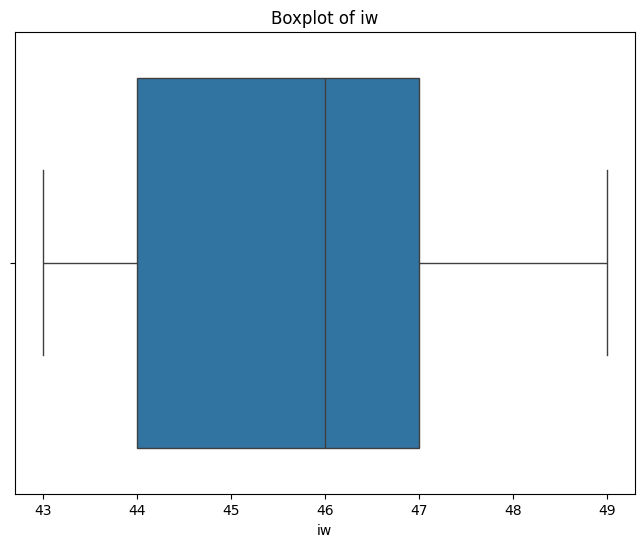

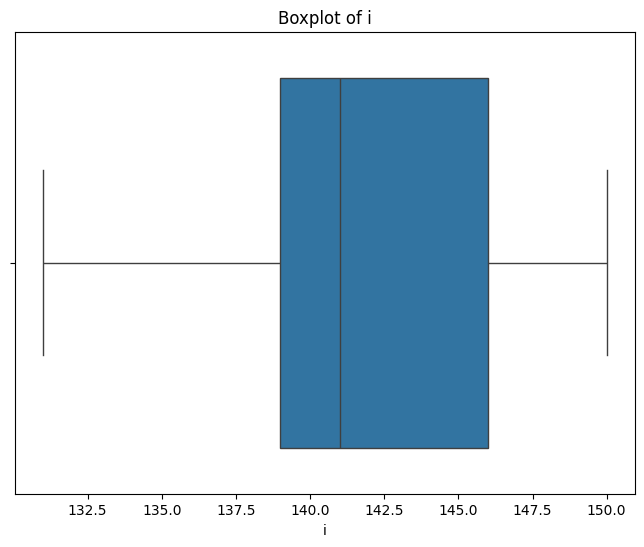

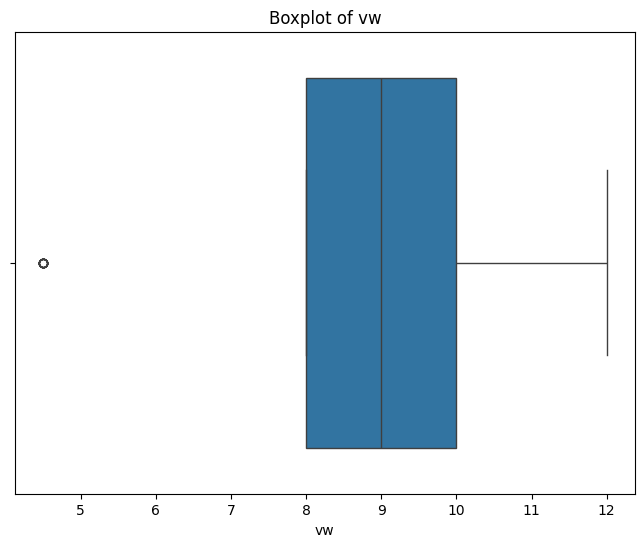

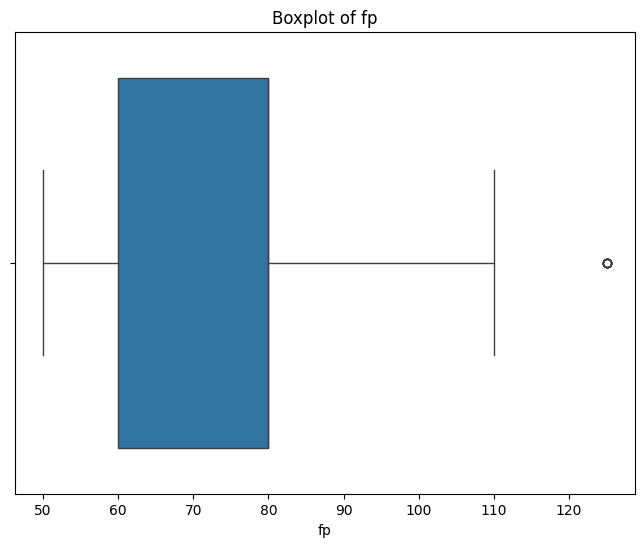

In [12]:
# Создание "Ящиков с усами" для каждого столбца, чтобы проверить на выбросы
for column in df.columns[:-2]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

На двух последних графиках (vw и fp) обнаружены выбросы

In [13]:
# выведем наши два выброса
df.fp.max(), df.vw.min()

(125, 4.5)

In [14]:
# Сравним со срезом
df.shape

(65, 6)

In [15]:
# Посмотрм на данные выбросов
df[df.fp==df.fp.max()]


,iw,i,vw,fp,depth,width
32,48,131,10.0,125,0.84,2.16
33,48,131,10.0,125,0.86,2.08
34,48,131,10.0,125,0.88,2.00
35,48,131,10.0,125,0.80,2.04
36,49,132,8.0,125,0.84,2.28
37,49,132,8.0,125,0.84,2.24
38,49,132,8.0,125,0.80,2.24
39,49,132,8.0,125,0.80,2.28


In [16]:
df[df.vw==df.vw.min()]

,iw,i,vw,fp,depth,width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
5,45,140,4.5,80,1.72,2.48
6,45,140,4.5,80,1.64,2.52
7,45,140,4.5,80,1.64,2.56
28,47,139,4.5,80,1.36,2.52
29,47,139,4.5,80,1.36,2.48


Слишком много данных, чтобы их удалять

### Построим графики, показывающие распределения

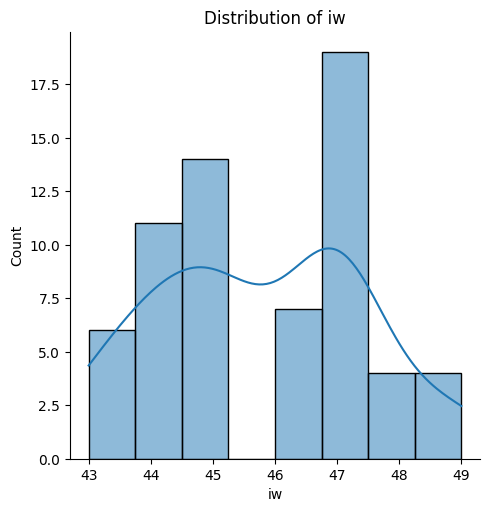

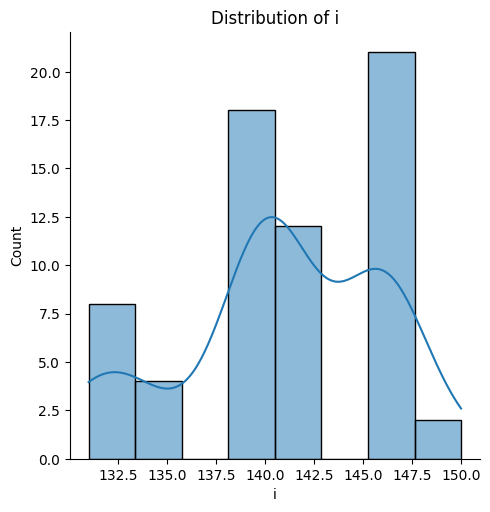

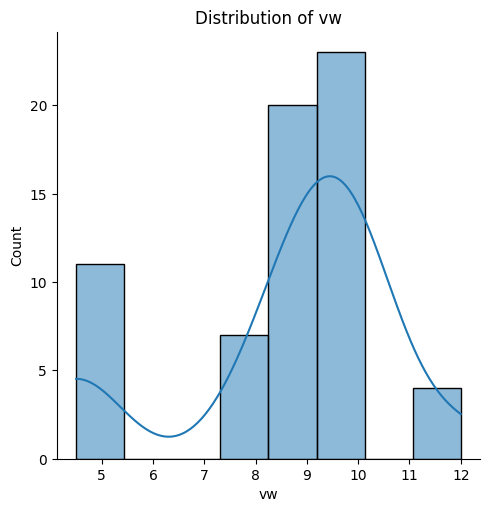

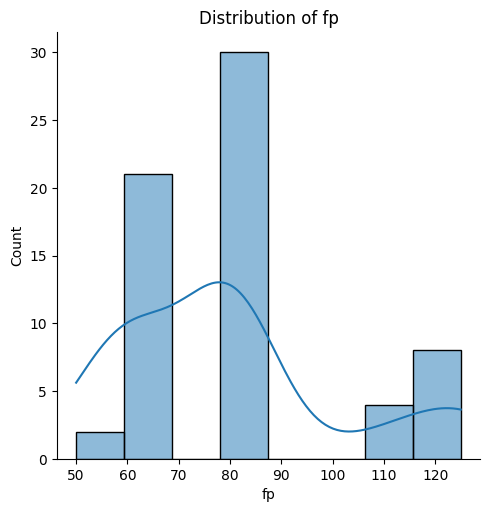

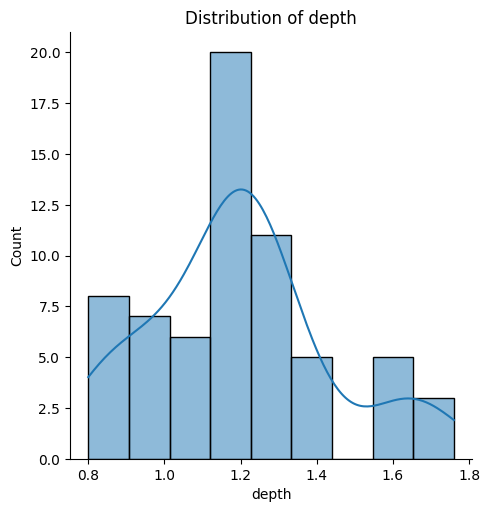

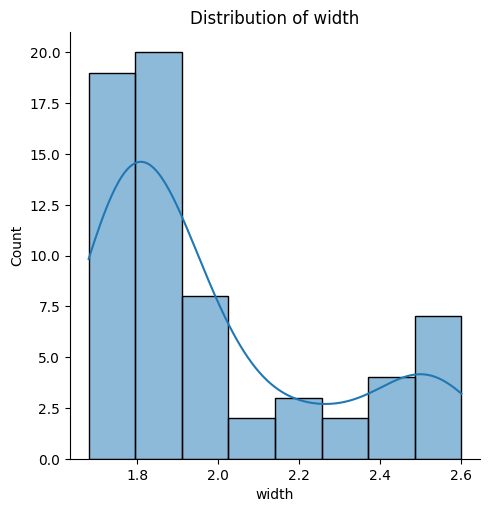

In [17]:
for column in df.columns:
    sns.displot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

По графикам видно, что распределение - ненормальное

###Построим графики корреляции

####Корреляционнаю матрица Heatmap

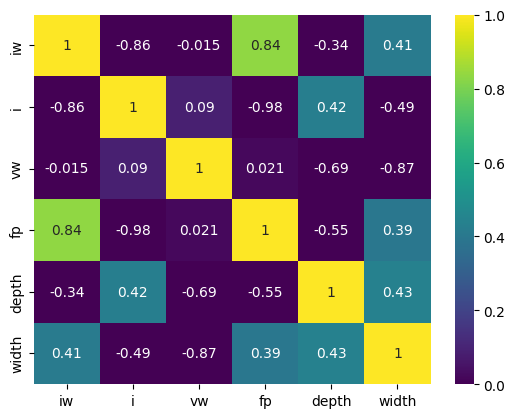

In [18]:
# Построим корреляционную матрицу
sns.heatmap(df.corr(), cmap='viridis', annot=True, vmin=0);

####Pairplot по целевым метрикам глубины(depth) и ширины (width)

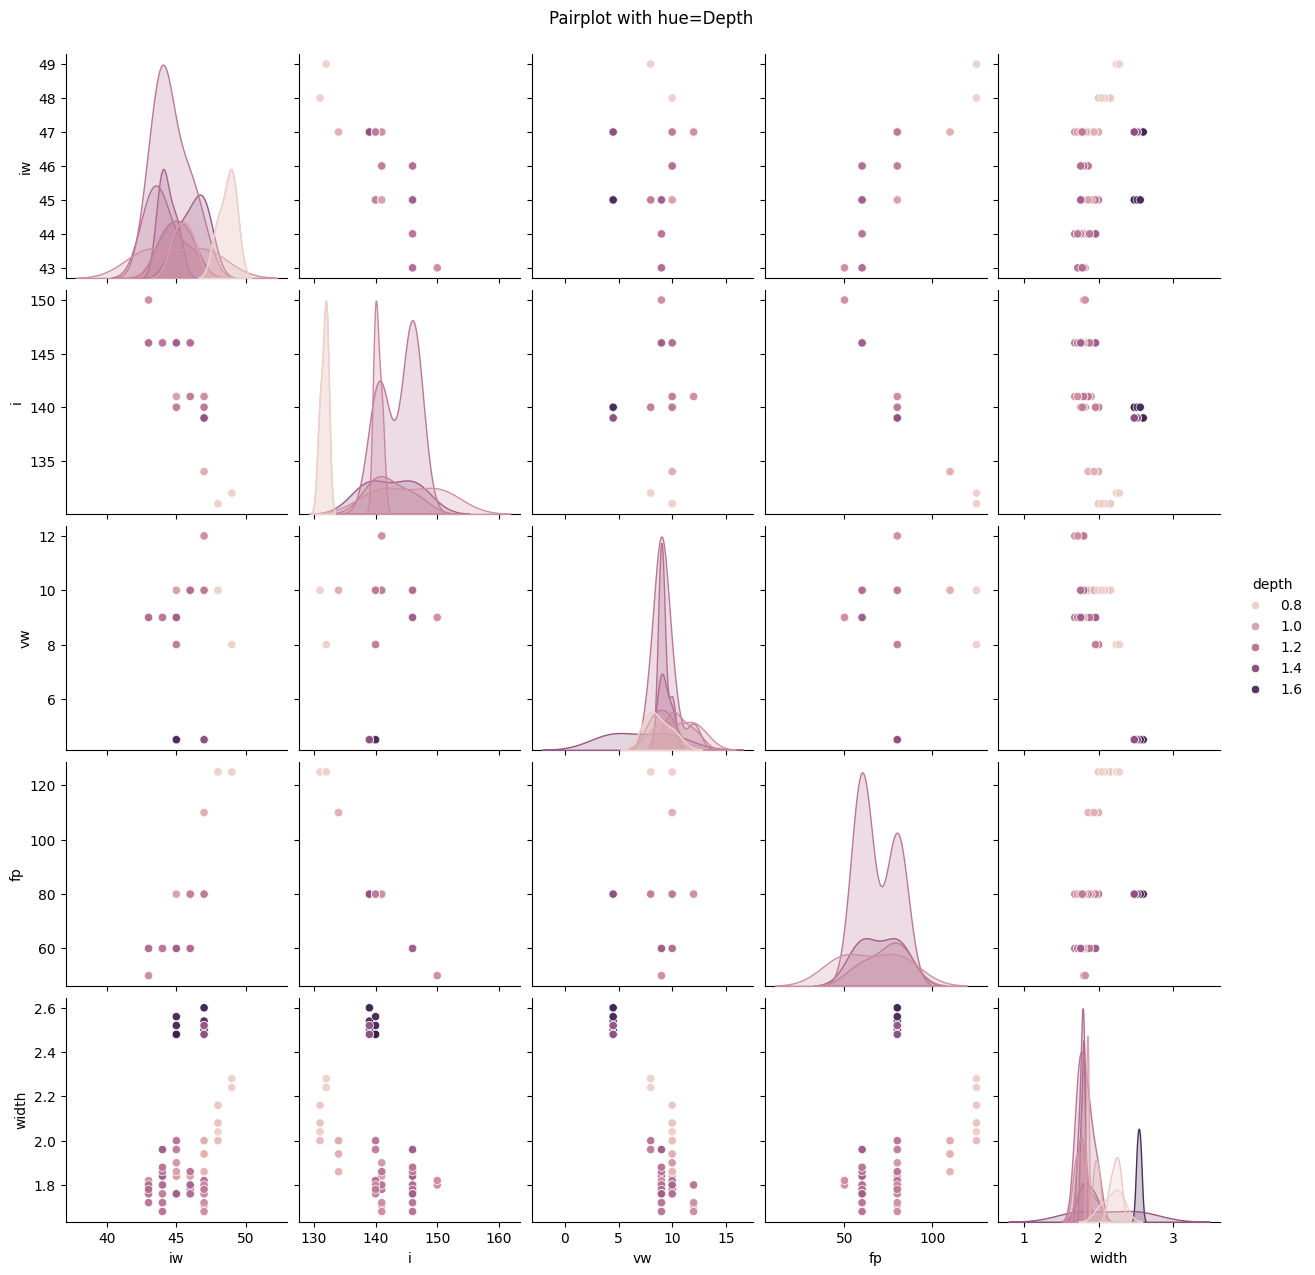

In [19]:
# Строим Pairplot по целевой метрике глубины
sns.pairplot(df, hue='depth')
plt.suptitle('Pairplot with hue=Depth', y=1.02)
plt.show()

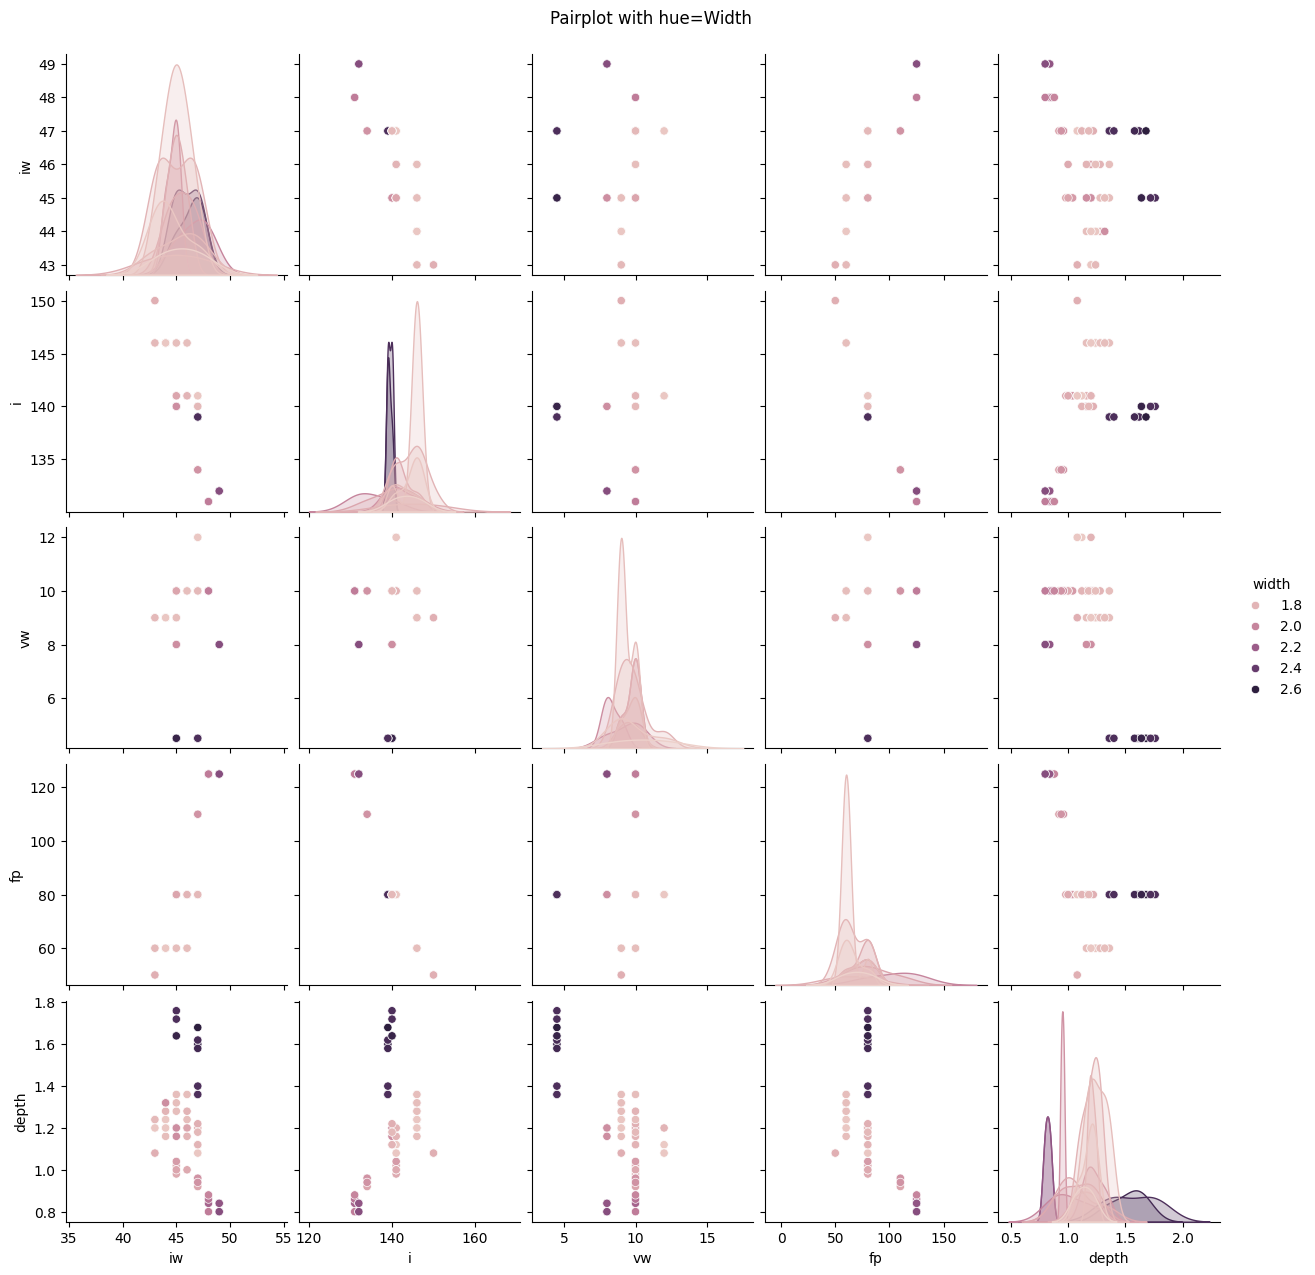

In [20]:
# Строим Pairplot по целевой метрике ширины
sns.pairplot(df, hue='width')
plt.suptitle('Pairplot with hue=Width', y=1.02)
plt.show()

Графики корреляций показали, что мультиколлинеарность не обнаружена, а так же присутствуют положительная и оттрицательная корреляции, по этому ничего убирать нельзя.

# **Построение модели**

##Разобьём датасет на целевые метрики

In [21]:
df.columns

Index(['iw', 'i', 'vw', 'fp', 'depth', 'width'], dtype='object')

In [22]:
X_train = df.drop(['depth', 'width'], axis=1)
y1 = df['depth']
y2 = df['width']

##Разделим их на тренировочные и тестовые

In [23]:
X, X_test, y1, y_test1 = train_test_split(X_train, y1, test_size=0.15, random_state=42)

In [24]:
X, X_test, y2, y_test2 = train_test_split(X_train, y2, test_size=0.15, random_state=42)

In [25]:
# проверка кол-ва строк и столбцов depth
X.shape, X_test.shape, y1.shape, y_test1.shape

((55, 4), (10, 4), (55,), (10,))

In [26]:
# проверка кол-ва строк и столбцов width
X.shape, X_test.shape, y2.shape, y_test2.shape

((55, 4), (10, 4), (55,), (10,))

##Создадим словари перебираемых параметров будущих моделей и ансамблей (Random Forest Regressor, Decision Tree Regressor, LightGBM Regressor, XGBoost Regressor)

In [33]:
# Параметры для Random Forest Regressor
forest_params = {
    'n_estimators' : range(100, 400, 50),
    'max_depth' : range(5, 15, 3),
    'min_samples_split' : (2, 3, 4),
    'min_samples_leaf' : (1, 2, 3, 4)
}

# Параметры для Decision Tree Regressor
tree_params = {
    'max_depth': range(1, 20)
}

# Параметры для LightGBM Regressor
lgbm_params = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'importance_type': ['split', 'gain'],
    'learning_rate': [0.1, 0.05, 0.3, 0.01, 0.6],
    'n_estimators': [50, 100, 150, 500, 1000],
    'n_jobs': [-1],
    'subsample_for_bin': [200000, 50000, 100000]
}

# Параметры для XGBoost Regressor (Gradient Boosting для регрессии)
xgboost_params = {
    'xgboostregressor__max_depth' : range(10, 16 , 5),
    'xgboostregressor__learning_rate' : [0.1, 0.3, 0.01],
    'xgboostregressor__n_estimators' : range(100, 400, 50)
}


##Функция RandomizedSearchCV

In [28]:
# Функция обучит модель с помощью RandomizedSearchCV
def randomiz_search_regression(model, params: 'dict', num_iter: 'int', cv: 'int', X, y, random_state=None):

    # Используем RandomizedSearchCV для поиска гиперпараметров
    model = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=num_iter,
        verbose=200,
        scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
        cv=cv,
        n_jobs=-1,
        refit='neg_root_mean_squared_error',  # Модель будет оптимизирована по RMSE
        random_state=random_state
    )

    # Обучаем модель
    model.fit(X, y)

    # Выведем метрики на экран
    best_rmse = -model.best_score_  # RMSE отрицательное в scoring, поэтому берем отрицание
    mean_mae = -model.cv_results_['mean_test_neg_mean_absolute_error'].mean()  # MAE тоже отрицательное
    mean_r2 = model.cv_results_['mean_test_r2'].mean()  # R² метрика

    print("Best RMSE:", round(best_rmse, 4))
    print("Mean MAE:", round(mean_mae, 4))
    print("Mean R²:", round(mean_r2, 4))

    return model

In [56]:
# для хранения результатов

result_depth, result_width = [], []

##Пайплайн для Decision Tree Regressor с RandomizedSearchCV

In [57]:
# Обучим первую модель Decision Tree Regressor
model_tree_depth = randomiz_search_regression(
    model=DecisionTreeRegressor(
        random_state=42
    ),
    params=tree_params, num_iter=19, cv=5, X=X, y=y1, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_depth.append(round(model_tree_depth.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best RMSE: 0.0713
Mean MAE: 0.0627
Mean R²: 0.8391


In [58]:
# Обучим вторую модель Decision Tree Regressor
model_tree_width = randomiz_search_regression(
    model=DecisionTreeRegressor(
        random_state=42
    ),
    params=tree_params, num_iter=19, cv=5, X=X, y=y2, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_width.append(round(model_tree_width.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best RMSE: 0.0506
Mean MAE: 0.045
Mean R²: 0.935


##Пайплайн для Random Forest Regressor с RandomizedSearchCV

In [59]:
# Обучим первую модель Random Forest Regressor
model_forest_depth = randomiz_search_regression(
    model=RandomForestRegressor(
        random_state=42
    ),
    params=forest_params, num_iter=15, cv=5, X=X, y=y1, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_depth.append(round(model_forest_depth.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best RMSE: 0.0739
Mean MAE: 0.0671
Mean R²: 0.8356


In [60]:
# Обучим вторую модель Random Forest Regressor
model_forest_width = randomiz_search_regression(
    model=RandomForestRegressor(
        random_state=42
    ),
    params=forest_params, num_iter=15, cv=5, X=X, y=y2, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_width.append(round(model_forest_width.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best RMSE: 0.0607
Mean MAE: 0.0544
Mean R²: 0.9178


##Пайплайн для LGBMRegressor с RandomizedSearchCV

In [61]:
# Обучим первую модель с помощью LGBMRegressor
model_lgbm_depth = randomiz_search_regression(
    model=LGBMRegressor(
        random_state=42
    ),
    params=lgbm_params, num_iter=15, cv=5, X=X, y=y1, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_depth.append(round(model_lgbm_depth.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 3
[LightGBM] [Info] Start training from score 1.183636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [62]:
# Обучим вторую модель с помощью LGBMRegressor
model_lgbm_width = randomiz_search_regression(
    model=LGBMRegressor(
        random_state=42
    ),
    params=lgbm_params, num_iter=15, cv=5, X=X, y=y2, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_width.append(round(model_lgbm_width.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 3
[LightGBM] [Info] Start training from score 1.977636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

##Пайплайн для XGBoost с RandomizedSearchCV

In [63]:
# Обучим первую модель XGBoost Regressor
model_xgboost_depth = randomiz_search_regression(
    model=XGBRegressor(
        random_state=42
    ),
    params=xgboost_params, num_iter=15, cv=5, X=X, y=y1, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_depth.append(round(model_xgboost_depth.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best RMSE: 0.0716
Mean MAE: 0.0555
Mean R²: 0.8798


In [64]:
# Обучим вторую модель XGBoost Regressor
model_xgboost_width = randomiz_search_regression(
    model=XGBRegressor(
        random_state=42
    ),
    params=xgboost_params, num_iter=15, cv=5, X=X, y=y2, random_state=42
)

# Добавим лучший результат модели (R2) в список
result_width.append(round(model_xgboost_width.cv_results_['mean_test_r2'].mean(), 4))  # Лучший R2

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best RMSE: 0.0516
Mean MAE: 0.0383
Mean R²: 0.9597


## Посмотрим на таблицу с результатами метрик обучения

In [65]:
algorithms = ['Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost']

# Создание DataFrame
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Best RMSE Depth': result_depth,
    'Best RMSE Width': result_width
})

In [66]:
results_df

,Algorithm,Best RMSE Depth,Best RMSE Width
0,Decision Tree,0.8391,0.9350
1,Random Forest,0.8356,0.9178
2,LightGBM,-0.0010,0.3576
3,XGBoost,0.8798,0.9597


Лучшие результаты показала модель - XGBoost, на ней и будем строить предсказание





## Предсказание

In [69]:
# Обучим первую модель XGBoost на тренировочной выборке с лучшими гиперпараметрами
model_xgboost_depth = XGBRegressor(random_state=42)
model_xgboost_depth.fit(X, y1)

# Предсказания на тестовой выборке
y_pred1 = model_xgboost_depth.predict(X_test)

# Вычислим метрики
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
mae = mean_absolute_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)

# Выведем результаты
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.0714
MAE: 0.0467
R²: 0.9200


In [71]:
# Обучим вторую модель XGBoost на тренировочной выборке с лучшими гиперпараметрами
model_xgboost_width = XGBRegressor(random_state=42)
model_xgboost_width.fit(X, y2)

# Предсказания на тестовой выборке
y_pred2 = model_xgboost_width.predict(X_test)

# Вычислим метрики
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
mae = mean_absolute_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

# Выведем результаты
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.0622
MAE: 0.0494
R²: 0.9550


# Экспорт моделей

In [72]:
# Код эксопрта для каждой модели
with open("model_xgboost_depth.pkl", "wb") as f:
    pickle.dump(model_xgboost_depth, f)

with open("model_xgboost_width.pkl", "wb") as f:
    pickle.dump(model_xgboost_width, f)

#Вывод

В процессе работы были проведены анализ и моделирование данных, включая предобработку данных, их анализ, обучение моделей с оценкой их производительности.

На стадии **разведочного анализа данных** не было выявлено пропущенных данных. В данных были найдены и удалены абсолютные дубликаты записей для повышения точности модели и предотвращения переобучения. Так же, для удобства работы названия столбцов былим приведены к единому регистру.

Для каждого признака были построены **распределения**, что позволило выявить закономерности и особенности в данных. Также была проведена проверка **корреляций** между признаками, но ни одна из корреляций не потребовала вмешательства или корректировок, что говорит об отсутствии мультиколлинеарности или значительной избыточности данных.

После предобработки мы перешли на этап **построения модели**, где была выполнена разбивка на **тренировочную** и **тестовую** выборки для оценки качества моделей. Основное внимание было уделено тренировочной выборке, которая была подвергнута кроссвалидации через **RandomizedSearchCV**, с целью подбора лучших гиперпараметров моделей.

Для оценки качества моделей мы выбрали следующие три метрики:

1. **Mean Absolute Error (MAE)** — это средняя абсолютная ошибка, измеряющая среднее отклонение предсказаний от фактических значений в тех же единицах. Она устойчива к выбросам, однако может недооценивать крупные ошибки.

2. **Root Mean Squared Error (RMSE)** — это корень из средней квадратичной ошибки, которая больше наказывает крупные ошибки по сравнению с MAE, делая её чувствительной к выбросам. Тем не менее, RMSE легче интерпретировать, так как она измеряется в тех же единицах, что и целевая переменная.

3. **R-squared (R²)** — коэффициент детерминации, который измеряет, насколько хорошо модель объясняет вариации целевой переменной. Значение R² варьируется от 0 до 1, где 1 означает идеальное объяснение вариаций. Эта метрика полезна для понимания того, насколько хорошо модель подогнана под данные.

### Как мы выбирали:

- **MAE**: Если важна интерпретация и устойчивость к выбросам.
- **RMSE**: Если необходимо уделить больше внимания крупным ошибкам.
- **R²**: Если нужно оценить, насколько модель объясняет вариации данных.

Выбор модели был сделан на основе показателя **R²**, так как важно было понять, насколько модель объясняет вариации данных.

### Подбор моделей:

Для поиска лучших моделей мы применили **RandomizedSearchCV** на следующих моделях:

- **Decision Tree Regressor**,
- **Random Forest Regressor**,
- **LightGBM**,
- **XGBRegressor**.

### Результаты:

По итогам кросс-валидации на тренировочной выборке мы выбрали модель, показавшую лучшие результаты - **XGBRegressor**.

Затем мы повторно обучили эту модель на лучших гиперпараметрах и выполнили предсказания на **тестовой выборке**. Результаты показали, что данная модель продемонстрировали высокие показатели по выбранным метрикам, и ее качество можно считать более чем удовлетворительным для решения поставленной задачи.

### Итог:

Весь процесс включал полный цикл от анализа и подготовки данных до обучения и оценки моделей, что позволило нам получить точные предсказания для обеих целевых переменных.
